In [6]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Import and format crosswalk
df_cross = pd.read_csv('./data/county-cbsa-crosswalk-cleaned.csv')
df_cross = df_cross[['County Code','CBSA Code']]
df_cross = df_cross.rename(columns = {'County Code':'FIPS','CBSA Code':'GTCBSA'})
df_cross['FIPS'] = df_cross['FIPS'].astype(int).astype(str)

In [3]:
# Import and format DOT Trips data
df = pd.read_csv('./Data/DOT/Trips_by_Distance.csv')
df = df[df['Level']=='County']
df = df.rename(columns = {'County FIPS':'FIPS'})
df['FIPS'] = df['FIPS'].astype(int).astype(str)

In [4]:
# Combine datasets, format
df = df_cross.merge(df, on='FIPS', how='right')
df = df[~df['GTCBSA'].isna()]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

df = df[['GTCBSA','Date','Population Staying at Home','Population Not Staying at Home','Number of Trips',
         'Number of Trips <1','Number of Trips 1-3','Number of Trips 3-5','Number of Trips 5-10','Number of Trips 10-25',
         'Number of Trips 25-50','Number of Trips 50-100','Number of Trips 100-250','Number of Trips 250-500',
         'Number of Trips >=500','Week','Month']].copy()

df['Year'] = pd.DatetimeIndex(df['Date']).year

In [12]:
df['Year'].max()

2023

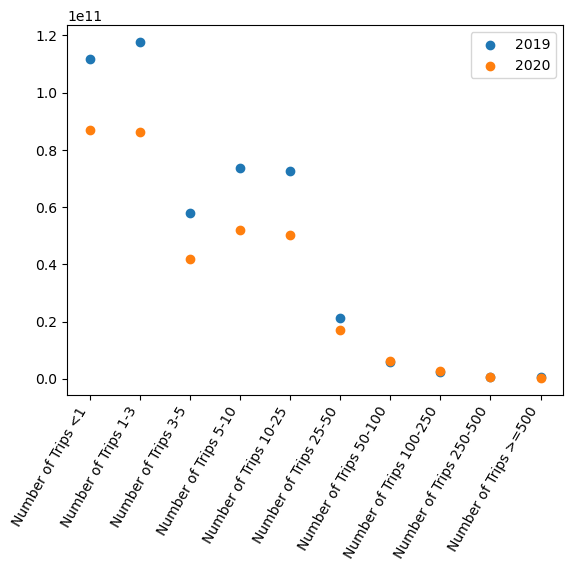

In [17]:
vars = ['Number of Trips <1','Number of Trips 1-3','Number of Trips 3-5','Number of Trips 5-10','Number of Trips 10-25',
         'Number of Trips 25-50','Number of Trips 50-100','Number of Trips 100-250','Number of Trips 250-500',
         'Number of Trips >=500',]

trips = [df[df['Year']==2019][i].sum() for i in vars]
plt.scatter(vars, trips, label='2019')

trips = [df[df['Year']==2020][i].sum() for i in vars]
plt.scatter(vars, trips, label='2020')

plt.xticks(rotation=60, ha='right')
plt.legend()

In [5]:
# Aggregate data
df_cbsa = df.groupby(['GTCBSA','Date', 'Week', 'Month', 'Year']).sum()
df_cbsa = df_cbsa.reset_index()
df_cbsa['POP'] = df_cbsa[['Population Staying at Home','Population Not Staying at Home']].sum(axis=1)

In [6]:
# Export Results
df_cbsa.to_csv('./data/cbsa_mobility_semi_raw.csv', index=False)